In [ ]:
import pandas as pd
from transformers import AutoTokenizer
import numpy as np
import tensorflow as tf
from transformers import TFAutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
bert = TFAutoModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
SEQ_LEN = 200

In [ ]:
df = pd.read_csv('processed_data.csv')
Xids = np.zeros((len(df),SEQ_LEN))
Xmask = np.zeros((len(df),SEQ_LEN))

In [ ]:
anot = {}
for ele in df['Annotation']:
  if ele in anot:
    anot[ele]+=1
  else:
    anot[ele] = 1
anot

{'U': 132, 'S': 182, 'N': 568}

In [ ]:
print(len(df))
df = df.dropna()
print(len(df))

882
882


In [ ]:
for i in range(len(df)):
    try:
        tokens = tokenizer.encode_plus(df['PlainText'][i],max_length = SEQ_LEN,
                                      truncation=True,padding='max_length',return_token_type_ids = False,return_attention_mask = True,return_tensors = 'tf')
        Xids[i:] = tokens['input_ids']
        Xmask[i:] = tokens['attention_mask']    
    except:
        print(i)

In [ ]:
len(Xids[0])

200

In [ ]:
arr = df['Annotation'].values
print(type(arr))
def switch(row):
    dic = {
        'S':0,
        'N':1,
        'U':2
    }
    return dic.get(row)

arr =  np.array([switch(x) for x in arr])
print(np.unique(arr))
labels = np.zeros((arr.size,len(np.unique(arr))))
arr

<class 'numpy.ndarray'>
[0 1 2]


array([2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0,
       1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2,
       0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,

In [ ]:
labels[np.arange(arr.size),arr] = 1
labels[0:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
# tf wants data as tuple 0 index should be input, and 1 should be label
# for bert the input tuple should have a dictionary that has mask and input_ids
dataset = tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([  101.,  2025.,  3710.,  2111., 21888.,  9068.,  6206., 11560.,
        2172., 19424.,  2131.,  2111., 17212.,  2278., 15181.,  2071.,
       11655., 10431.,  2135.,  4190., 25090., 28732., 15945.,  2270.,
        2173.,  5674.,  2468.,  2406.,  6187.,  2050., 17212.,  2278.,
        7528.,   102.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0

In [ ]:
def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask},labels

In [ ]:
dataset = dataset.map(map_func)
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(200,), dtype=float64, numpy=
array([  101.,  2025.,  3710.,  2111., 21888.,  9068.,  6206., 11560.,
        2172., 19424.,  2131.,  2111., 17212.,  2278., 15181.,  2071.,
       11655., 10431.,  2135.,  4190., 25090., 28732., 15945.,  2270.,
        2173.,  5674.,  2468.,  2406.,  6187.,  2050., 17212.,  2278.,
        7528.,   102.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,

In [ ]:
dataset = dataset.shuffle(10000).batch(8)
DS_LEN = len(list(dataset))
DS_LEN

111

In [ ]:
SPLIT = .8
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,),name='input_ids',dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,),name='attention_mask',dtype='int32')
embeddings = bert(input_ids,attention_mask=mask)[0]
rnn_layer = tf.keras.layers.SimpleRNN(units=512, name='rnn_layer')(embeddings)
# x = tf.keras.layers.GlobalMaxPool1D()(rnn_layer)
# x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256,activation='relu')(rnn_layer)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
x = tf.keras.layers.Dense(16,activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8,activation='relu')(x)
y = tf.keras.layers.Dense(3,activation='softmax',name='outputs')(x)

In [ ]:
model = tf.keras.Model(inputs=[input_ids,mask],outputs=y)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 200)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 200,                                         

In [ ]:
model.layers[2].trainable = False
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 200)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 200,                                         

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
model.compile(optimizer = optimizer,loss = loss,metrics = [acc])

In [ ]:
history = model.fit(train,validation_data = val,epochs = 50, class_weight={0:3.12,1:1,2:4.3})

Epoch 1/50
89/89 [==============================] - 34s 386ms/step - loss: 1.6132 - accuracy: 0.6194 - val_loss: 0.7343 - val_accuracy: 0.6824
Epoch 2/50
89/89 [==============================] - 29s 324ms/step - loss: 1.5709 - accuracy: 0.6348 - val_loss: 0.7079 - val_accuracy: 0.6824
Epoch 3/50
89/89 [==============================] - 31s 347ms/step - loss: 1.5903 - accuracy: 0.6334 - val_loss: 0.5964 - val_accuracy: 0.7471
Epoch 4/50
89/89 [==============================] - 31s 341ms/step - loss: 1.5226 - accuracy: 0.6685 - val_loss: 0.6760 - val_accuracy: 0.7000
Epoch 5/50
89/89 [==============================] - 29s 324ms/step - loss: 1.4499 - accuracy: 0.6713 - val_loss: 0.6943 - val_accuracy: 0.7000
Epoch 6/50
89/89 [==============================] - 29s 327ms/step - loss: 1.4006 - accuracy: 0.6812 - val_loss: 0.6112 - val_accuracy: 0.7529
Epoch 7/50
89/89 [==============================] - 29s 324ms/step - loss: 1.3151 - accuracy: 0.7135 - val_loss: 0.5292 - val_accuracy: 0.7647

In [ ]:
y_test = []
y_pred = []

for ele in val:

    preds = model.predict(ele[0])
#     print(preds)
#     print(ele[1])

    for x in preds:
        y = np.argmax(x)
#         print(y)
        y_pred.append(y)
        
#     print('sadad')
        
    for x in ele[1]:
        y = np.argmax(x)
#         print(y)
        y_test.append(y)
#     print('-------------------------')

1/1 [==============================] - 0s 227ms/step


In [ ]:
len(y_pred)
predictions = y_pred
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
# from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Accuracy_score:  0.9647058823529412
Precision_score:  0.9647058823529412
Recall_score:  0.9647058823529412
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.95      0.97       113
           2       0.92      1.00      0.96        24

    accuracy                           0.96       170
   macro avg       0.94      0.98      0.96       170
weighted avg       0.97      0.96      0.97       170



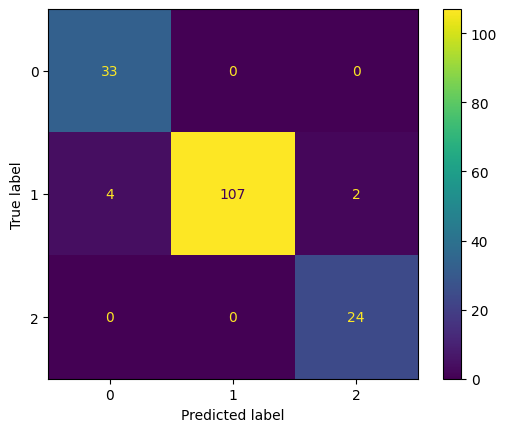

In [ ]:
# plot_confusion_matrix(y_test,predictions)
cm = confusion_matrix(y_test, predictions, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions,average='micro')
rec_score = recall_score(y_test,predictions,average='micro')
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)
disp.plot()

In [ ]:
model.save("86accuracy_vinay.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save("/content/gdrive/My Drive/BTP/86accuracy_vinay.h5")